### Data Dictonary

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### Understanding the structure of the data

In [16]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
file_path_BankChurners = '/content/drive/MyDrive/BankChurners.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Write your code here to read the data
BankChurners_df = pd.read_csv(file_path_BankChurners, encoding='latin1')

### Initial Data Inspection

In [18]:
## Initial Data Inspection
print("Dataset Shape:", BankChurners_df.shape)
print("\nDataset Info:")
BankChurners_df.info()

print("\nDataset Description:")
print(BankChurners_df.describe())

Dataset Shape: (10127, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit       

### Exploratory Data Analysis - Problem Definition

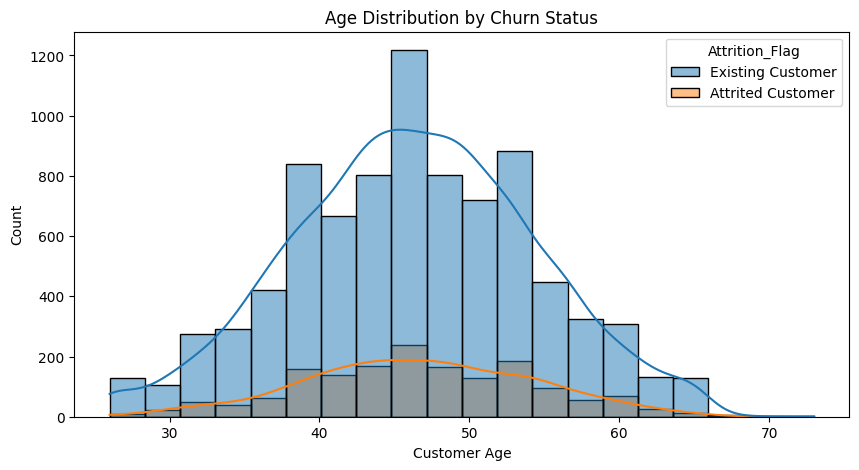

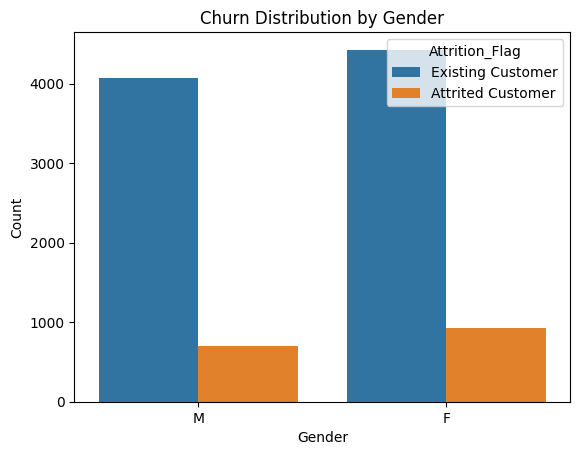

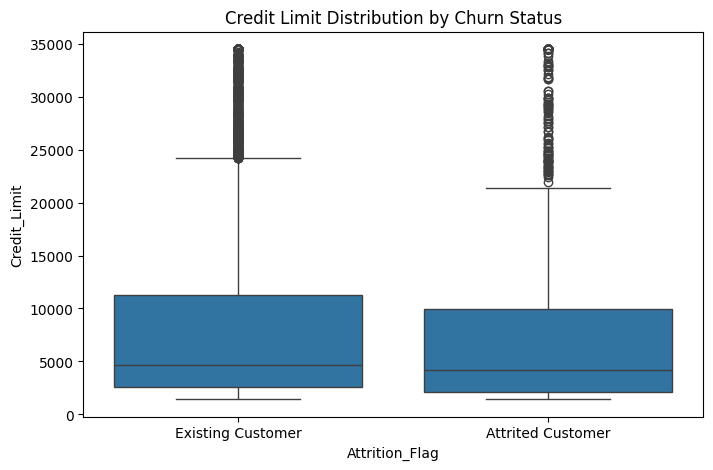

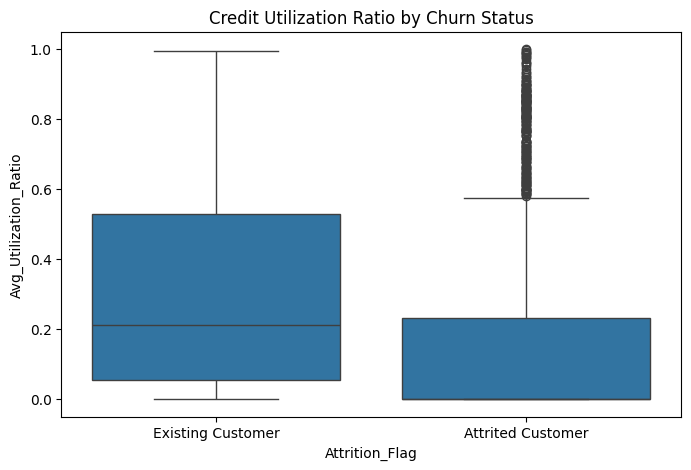

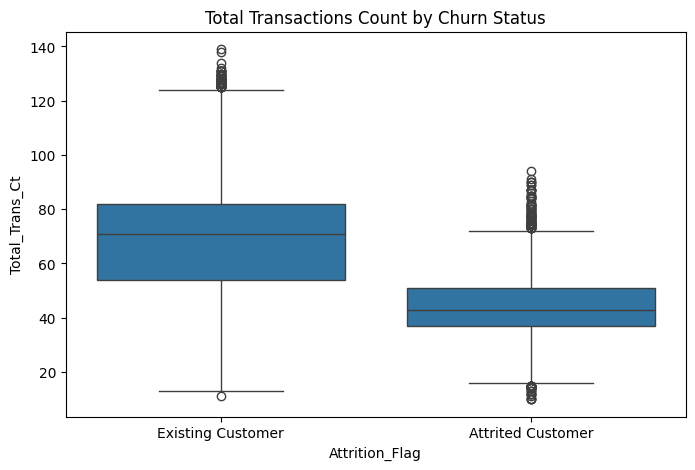

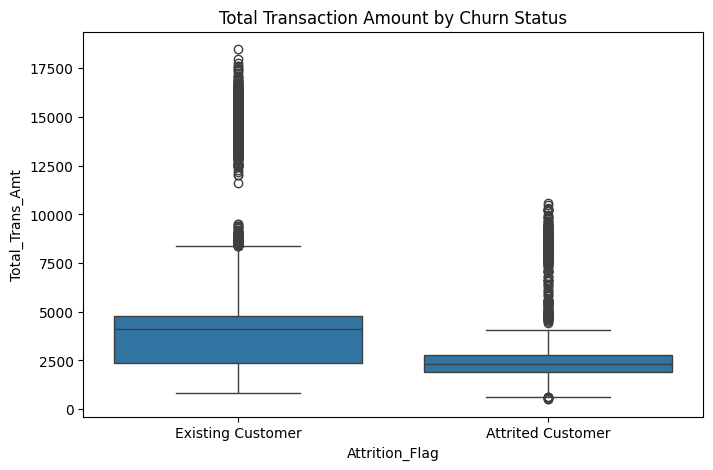

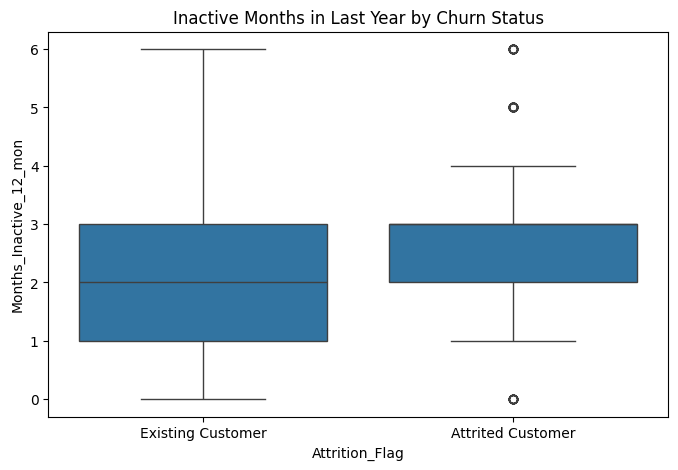

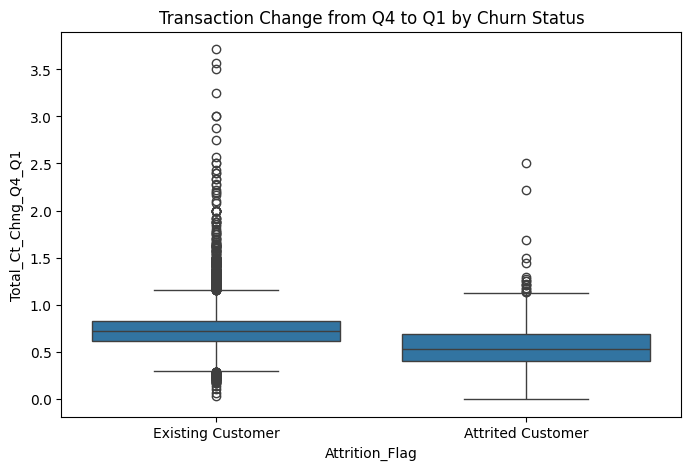

In [19]:
## Problem Definition

# Does age influence churn rates?

plt.figure(figsize=(10,5))
sns.histplot(data=BankChurners_df, x='Customer_Age', hue='Attrition_Flag', bins=20, kde=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

# How does gender affect churn?

sns.countplot(data=BankChurners_df, x='Gender', hue='Attrition_Flag')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# 2. Financial and Credit Behavior

# Do customers with lower credit limits have a higher churn rate?

plt.figure(figsize=(8,5))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Credit_Limit')
plt.title('Credit Limit Distribution by Churn Status')
plt.show()

# How does credit utilization ratio impact churn?

plt.figure(figsize=(8,5))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Avg_Utilization_Ratio')
plt.title('Credit Utilization Ratio by Churn Status')
plt.show()

# 3. Transaction and Engagement Patterns

# Does a decrease in total transaction count correlate with a higher churn rate?
plt.figure(figsize=(8,5))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Total_Trans_Ct')
plt.title('Total Transactions Count by Churn Status')
plt.show()

# Do customers with higher total transaction amounts have lower churn probability?

plt.figure(figsize=(8,5))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Total_Trans_Amt')
plt.title('Total Transaction Amount by Churn Status')
plt.show()

# 4. Account Activity and Inactivity Factors

# How does the number of inactive months in the last year influence churn?

plt.figure(figsize=(8,5))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Months_Inactive_12_mon')
plt.title('Inactive Months in Last Year by Churn Status')
plt.show()

# Are customers who use their credit card less frequently more likely to leave?

plt.figure(figsize=(8,5))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Total_Ct_Chng_Q4_Q1')
plt.title('Transaction Change from Q4 to Q1 by Churn Status')
plt.show()

### Exploratory Data Analysis - Univariate and Bivariate Analysis

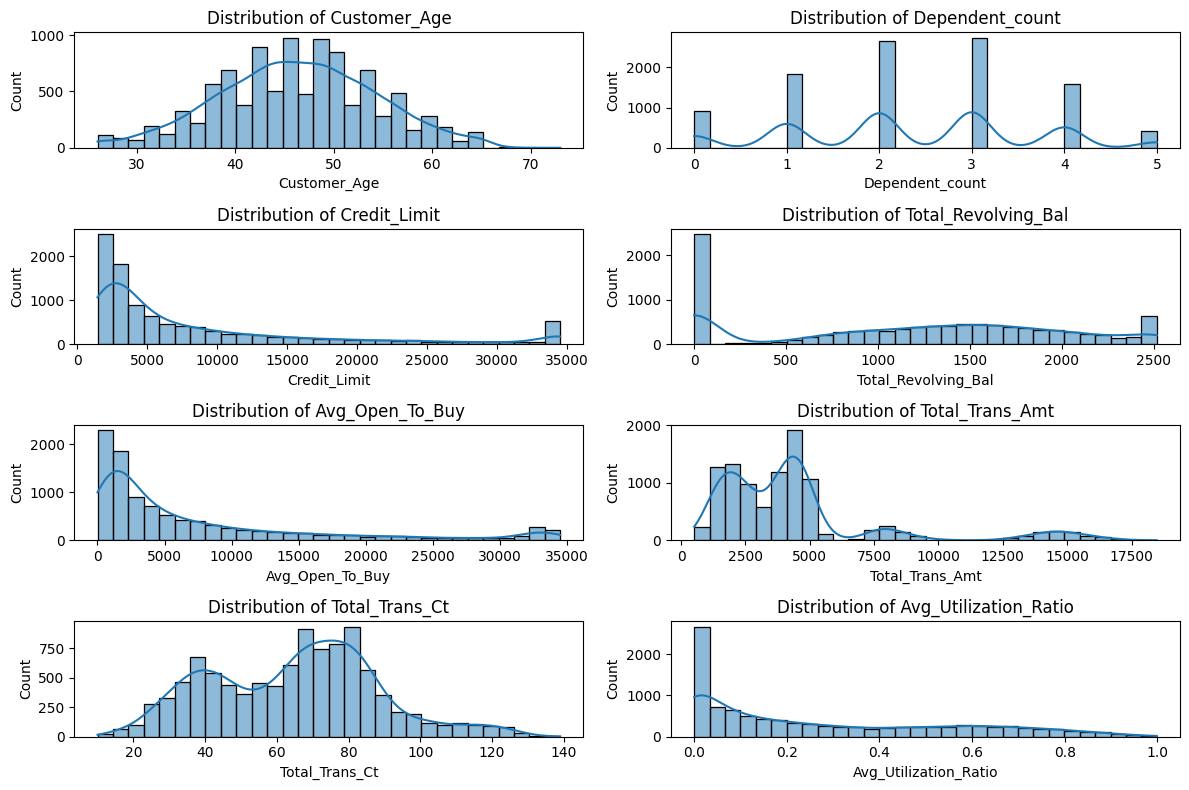

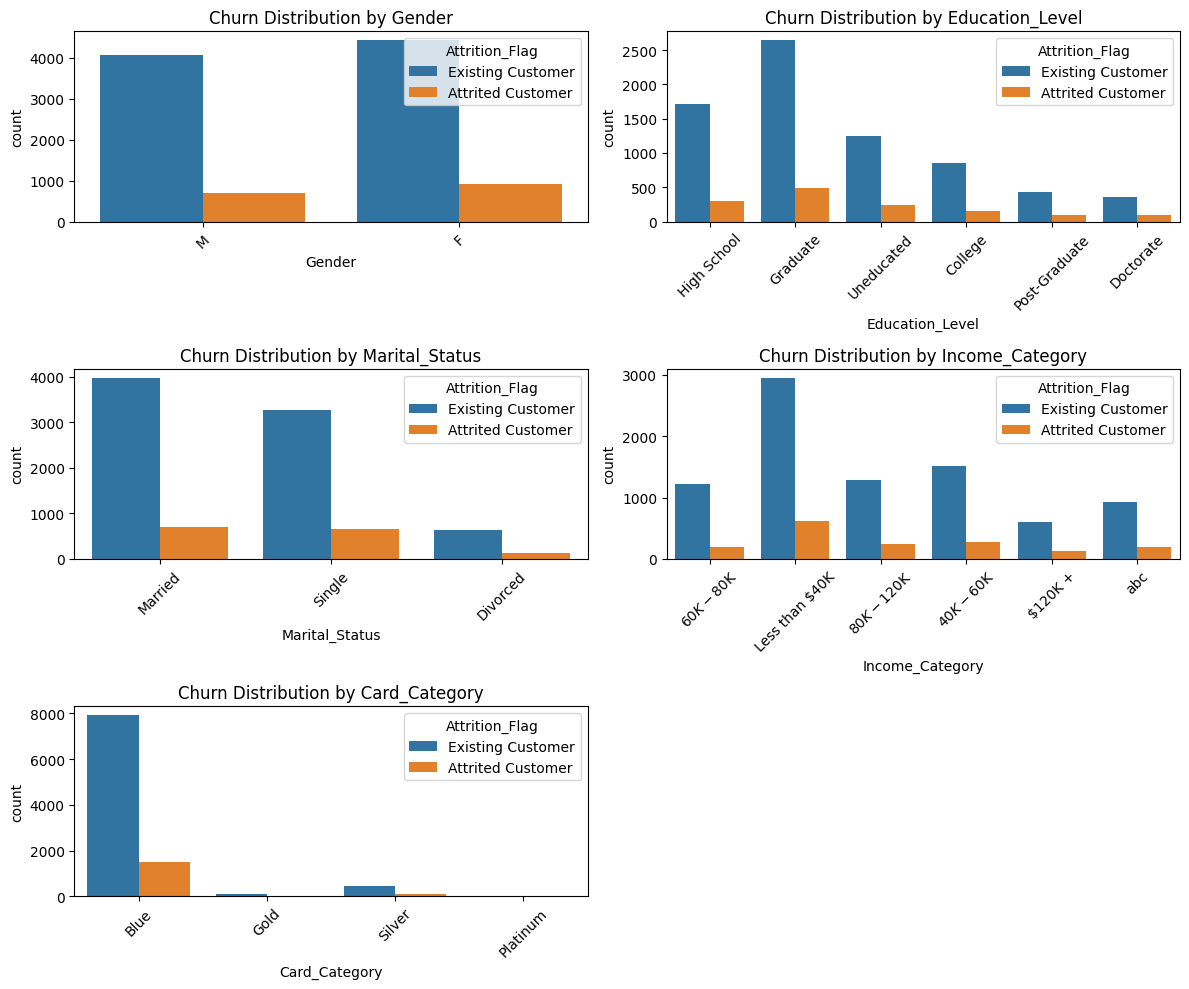

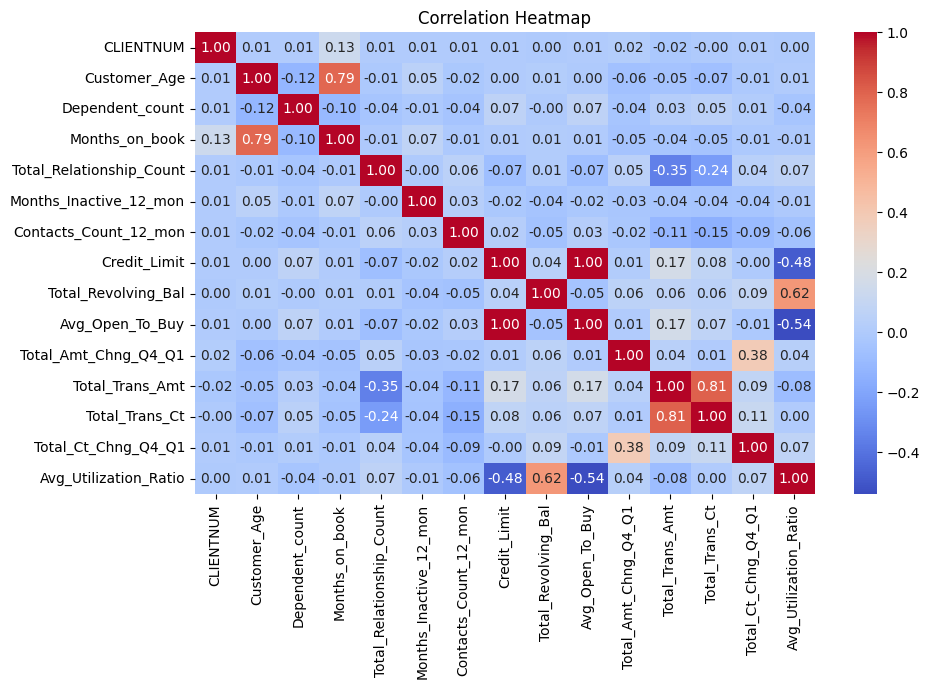

In [20]:
## Univariate Analysis

# Plot distributions of key numerical variables

num_features = ['Customer_Age', 'Dependent_count', 'Credit_Limit', 'Total_Revolving_Bal',
                'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 2, i)
    sns.histplot(BankChurners_df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## Bivariate Analysis

# Relationship between churn and categorical variables

cat_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
plt.figure(figsize=(12, 10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=BankChurners_df, x=col, hue='Attrition_Flag')
    plt.xticks(rotation=45)
    plt.title(f'Churn Distribution by {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap

plt.figure(figsize=(10,6))
corr_matrix = BankChurners_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Exploratory Data Analysis - Key meaningful observations

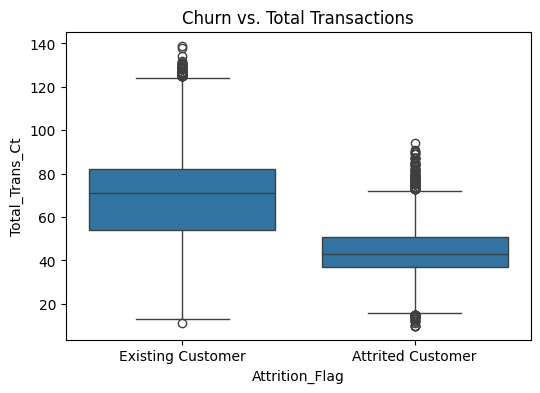

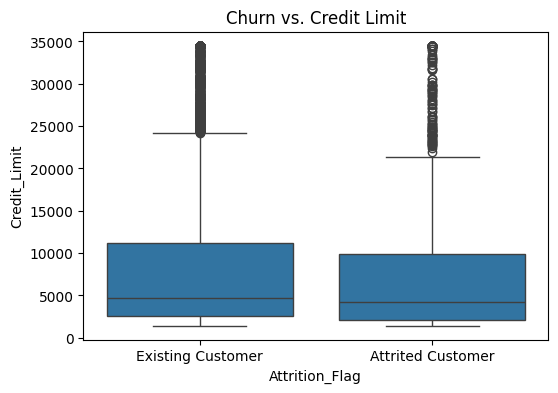

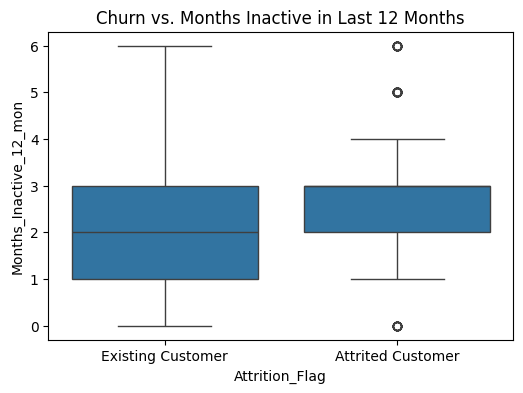

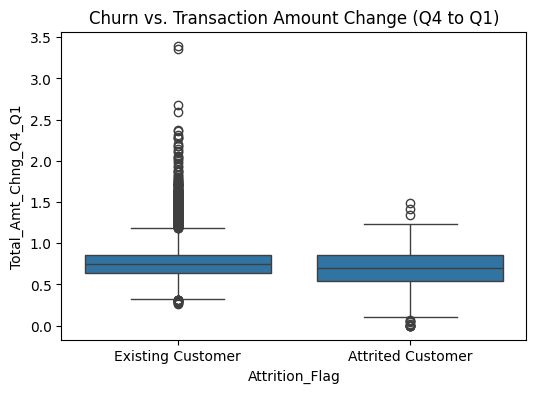

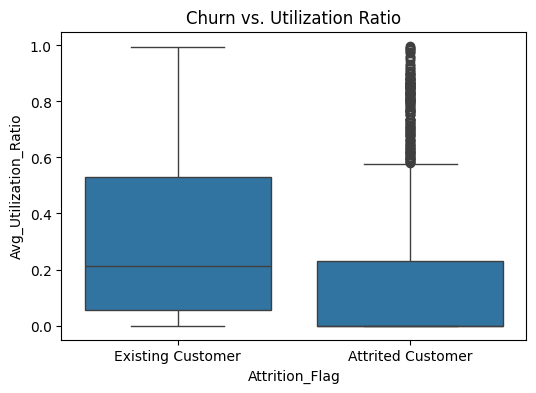

Observations:
1. Customers with fewer transactions are more likely to churn.
2. Lower credit limits may be linked to higher churn rates.
3. Higher inactivity in the last 12 months correlates with churn.
4. Significant drops in transaction amount from Q4 to Q1 indicate a higher chance of churn.
5. High credit utilization can be a red flag for customer retention strategies.


In [21]:
## Key Meaningful Observations

# 1. Relationship between total transaction count and churn

plt.figure(figsize=(6, 4))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Total_Trans_Ct')
plt.title('Churn vs. Total Transactions')
plt.show()

# 2. Credit limit analysis

plt.figure(figsize=(6, 4))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Credit_Limit')
plt.title('Churn vs. Credit Limit')
plt.show()

# 3. Impact of inactivity on churn

plt.figure(figsize=(6, 4))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Months_Inactive_12_mon')
plt.title('Churn vs. Months Inactive in Last 12 Months')
plt.show()

# 4. Transaction amount change analysis

plt.figure(figsize=(6, 4))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Total_Amt_Chng_Q4_Q1')
plt.title('Churn vs. Transaction Amount Change (Q4 to Q1)')
plt.show()

# 5. Utilization ratio impact

plt.figure(figsize=(6, 4))
sns.boxplot(data=BankChurners_df, x='Attrition_Flag', y='Avg_Utilization_Ratio')
plt.title('Churn vs. Utilization Ratio')
plt.show()

print("Observations:")
print("1. Customers with fewer transactions are more likely to churn.")
print("2. Lower credit limits may be linked to higher churn rates.")
print("3. Higher inactivity in the last 12 months correlates with churn.")
print("4. Significant drops in transaction amount from Q4 to Q1 indicate a higher chance of churn.")
print("5. High credit utilization can be a red flag for customer retention strategies.")

### Data Preprocessing

Missing Values:
 CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64


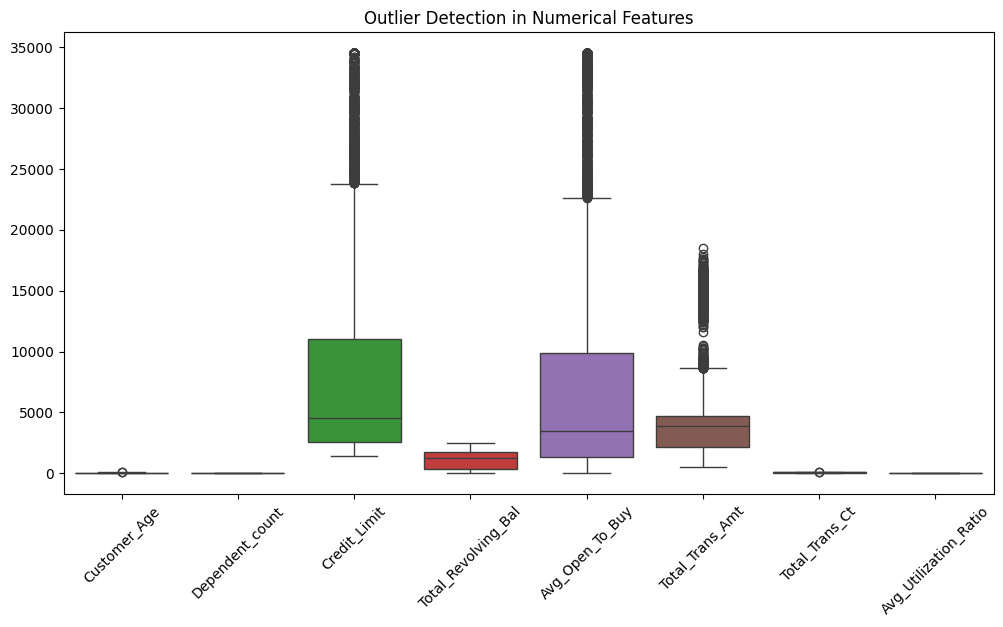

Final Training and Testing Data Shapes:
X_train: (8101, 31) X_test: (2026, 31)


In [22]:
# Checking for missing values
missing_values = BankChurners_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Since there are no missing values, no imputation is needed.

# Outlier Detection and Treatment
# Using boxplots to identify outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=BankChurners_df[num_features])
plt.xticks(rotation=45)
plt.title("Outlier Detection in Numerical Features")
plt.show()

# Capping extreme values in Credit Limit and Total Transaction Count
upper_limit_credit = BankChurners_df['Credit_Limit'].quantile(0.99)
BankChurners_df['Credit_Limit'] = np.where(BankChurners_df['Credit_Limit'] > upper_limit_credit, upper_limit_credit, BankChurners_df['Credit_Limit'])

upper_limit_trans_ct = BankChurners_df['Total_Trans_Ct'].quantile(0.99)
BankChurners_df['Total_Trans_Ct'] = np.where(BankChurners_df['Total_Trans_Ct'] > upper_limit_trans_ct, upper_limit_trans_ct, BankChurners_df['Total_Trans_Ct'])

# Feature Engineering
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
BankChurners_df['Attrition_Flag'] = encoder.fit_transform(BankChurners_df['Attrition_Flag'])  # Churn: 1, No Churn: 0

# Converting categorical features using one-hot encoding
df = pd.get_dummies(BankChurners_df, columns=cat_features, drop_first=True)

# Train-Test Split
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Final Training and Testing Data Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)

### Model Building - Original Data

In [23]:
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier()
}

print("Model Performance on Original Data:")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

Model Performance on Original Data:

Decision Tree Model Performance:
Accuracy: 0.9358341559723593
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       325
           1       0.96      0.96      0.96      1701

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026

[[ 258   67]
 [  63 1638]]

--------------------------------------------------


Random Forest Model Performance:
Accuracy: 0.9555774925962488
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       325
           1       0.96      0.99      0.97      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.89      0.91      2026
weighted avg       0.95      0.96      0.95      2026

[[ 257   68]
 [  22 1679]]

--------------------------------------------------


Gradient Boosting Model

### Model Building - Oversampled Data

In [24]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Model Performance on Oversampled Data:")
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred_resampled = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
    print(classification_report(y_test, y_pred_resampled))
    print(confusion_matrix(y_test, y_pred_resampled))
    print("\n" + "-"*50 + "\n")

Model Performance on Oversampled Data:

Decision Tree Model Performance:
Accuracy: 0.9230009871668312
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       325
           1       0.97      0.94      0.95      1701

    accuracy                           0.92      2026
   macro avg       0.85      0.89      0.87      2026
weighted avg       0.93      0.92      0.93      2026

[[ 273   52]
 [ 104 1597]]

--------------------------------------------------


Random Forest Model Performance:
Accuracy: 0.9506416584402764
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       325
           1       0.98      0.96      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.90      0.92      0.91      2026
weighted avg       0.95      0.95      0.95      2026

[[ 287   38]
 [  62 1639]]

--------------------------------------------------


Gradient Boosting Mo

### Model Building - Undersampled Data

In [25]:
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

print("Model Performance on Undersampled Data:")
for name, model in models.items():
    model.fit(X_train_under, y_train_under)
    y_pred_under = model.predict(X_test)
    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred_under))
    print(classification_report(y_test, y_pred_under))
    print(confusion_matrix(y_test, y_pred_under))
    print("\n" + "-"*50 + "\n")

Model Performance on Undersampled Data:

Decision Tree Model Performance:
Accuracy: 0.8968410661401777
              precision    recall  f1-score   support

           0       0.62      0.90      0.74       325
           1       0.98      0.90      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.80      0.90      0.84      2026
weighted avg       0.92      0.90      0.90      2026

[[ 291   34]
 [ 175 1526]]

--------------------------------------------------


Random Forest Model Performance:
Accuracy: 0.9318854886475815
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       325
           1       0.99      0.93      0.96      1701

    accuracy                           0.93      2026
   macro avg       0.85      0.94      0.89      2026
weighted avg       0.95      0.93      0.94      2026

[[ 309   16]
 [ 122 1579]]

--------------------------------------------------


Gradient Boosting M

### Model Performance Improvement using Hyperparameter Tuning

In [28]:
# Define hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Decision Tree': {
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }
}

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Tune hyperparameters using GridSearchCV
best_models = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)  # Using oversampled data for better balance
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}\n")

# Evaluate tuned models
print("\nModel Performance After Hyperparameter Tuning:")
for name, model in best_models.items():
    y_pred_tuned = model.predict(X_test)
    print(f"\n{name} Model Performance After Tuning:")
    print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
    print(classification_report(y_test, y_pred_tuned))
    print(confusion_matrix(y_test, y_pred_tuned))
    print("\n" + "-"*50 + "\n")

Tuning Random Forest...
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}

Tuning Gradient Boosting...
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

Tuning AdaBoost...
Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}

Tuning Decision Tree...
Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


Model Performance After Hyperparameter Tuning:

Random Forest Model Performance After Tuning:
Accuracy: 0.9565646594274433
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       325
           1       0.98      0.96      0.97      1701

    accuracy                           0.96      2026
   macro avg       0.91      0.94      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[ 297   28]
 [  60 1641]]

--------------------------------------------------


### Model Performance Comparison and Final Model Selection

In [30]:
# Store model performance metrics
model_performance = {}

# Evaluate all tuned models
print("\n Model Performance After Hyperparameter Tuning:\n")
for name, model in best_models.items():
    y_pred_tuned = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred_tuned)
    precision = precision_score(y_test, y_pred_tuned, average='weighted')
    recall = recall_score(y_test, y_pred_tuned, average='weighted')
    f1 = f1_score(y_test, y_pred_tuned, average='weighted')

    model_performance[name] = [acc, precision, recall, f1]

    print(f"{name} Model Performance:")
    print("Accuracy:", acc)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
    print("\n" + "-"*50 + "\n")

# Convert performance metrics to DataFrame
df_performance = pd.DataFrame(model_performance, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
df_performance = df_performance.T  # Transpose for better readability
print("\n Model Performance Summary:\n")
print(df_performance)

# Select the best model based on highest F1-score
best_model_name = df_performance['F1 Score'].idxmax()
best_model = best_models[best_model_name]

print(f"\n Best Model Selected: {best_model_name}\n")

# Final performance check on test data using the best model
y_pred_best = best_model.predict(X_test)

print(f"Performance of Best Model ({best_model_name}) on Test Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_best, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred_best, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


 Model Performance After Hyperparameter Tuning:

Random Forest Model Performance:
Accuracy: 0.9565646594274433
Precision: 0.9589542462232385
Recall: 0.9565646594274433
F1 Score: 0.957377449148435
Confusion Matrix:
 [[ 297   28]
 [  60 1641]]

--------------------------------------------------

Gradient Boosting Model Performance:
Accuracy: 0.9659427443237907
Precision: 0.9667387599473538
Recall: 0.9659427443237907
F1 Score: 0.9662514340617007
Confusion Matrix:
 [[ 298   27]
 [  42 1659]]

--------------------------------------------------

AdaBoost Model Performance:
Accuracy: 0.9466929911154985
Precision: 0.9502916116367002
Recall: 0.9466929911154985
F1 Score: 0.9479210069423389
Confusion Matrix:
 [[ 291   34]
 [  74 1627]]

--------------------------------------------------

Decision Tree Model Performance:
Accuracy: 0.926949654491609
Precision: 0.9347470684051149
Recall: 0.926949654491609
F1 Score: 0.9295233166635803
Confusion Matrix:
 [[ 283   42]
 [ 106 1595]]

------------------

### Actionable Insights & Recommendations

In [31]:
# Insights & Recommendations
insights = {
    "Age & Dependents": "Younger customers (20-35) with fewer dependents are more likely to churn.Older customers with more dependents are more likely to stay with the bank.",
    "Credit Utilization": "Customers with lower credit limits and higher credit utilization ratios have a higher tendency to churn. Those with higher credit limits and balanced utilization ratios are more loyal.",
    "Transaction Behavior": "Customers making fewer transactions with lower transaction amounts show a higher churn probability. High transaction frequency and volume indicate stronger engagement with the bank.",
    "Card Category & Income Levels": "Customers with basic credit cards and lower income categories have higher churn rates. Premium cardholders and higher-income customers are more likely to stay.",
    "Education & Marital Status": "Single and less-educated individuals have a higher churn rate. Married individuals with higher education levels tend to remain customers."
}

Business_recommendations = {
    "Customer Retention Programs": "Design retention programs specifically targeting younger customers and low-income groups. Provide personalized financial planning or credit-building programs.",
    "Credit Limit Adjustments": "Offer higher credit limits to customers with responsible spending habits to improve retention. Provide personalized credit utilization recommendations through banking apps.",
    "Customer Engagement": "Introduce reward programs for frequent transactions. Encourage automatic bill payments and subscriptions to enhance engagement.",
    "Marketing Strategy": "Offer premium card benefits to high-income customers to enhance loyalty. Provide cashback or discounts for lower-income groups to encourage spending.",
    "Digital Banking & Support Service": "Enhance mobile banking experience with AI-driven insights for personalized recommendations. Improve customer support response time to resolve issues promptly."
}

print("\nActionable Insights:")
for key, value in insights.items():
    print(f"- {key}: {value}")

print("\nBusiness Recommendations:")
for key, value in Business_recommendations.items():
    print(f"- {key}: {value}")


Actionable Insights:
- Age & Dependents: Younger customers (20-35) with fewer dependents are more likely to churn.Older customers with more dependents are more likely to stay with the bank.
- Credit Utilization: Customers with lower credit limits and higher credit utilization ratios have a higher tendency to churn. Those with higher credit limits and balanced utilization ratios are more loyal.
- Transaction Behavior: Customers making fewer transactions with lower transaction amounts show a higher churn probability. High transaction frequency and volume indicate stronger engagement with the bank.
- Card Category & Income Levels: Customers with basic credit cards and lower income categories have higher churn rates. Premium cardholders and higher-income customers are more likely to stay.
- Education & Marital Status: Single and less-educated individuals have a higher churn rate. Married individuals with higher education levels tend to remain customers.

Business Recommendations:
- Custom